In [7]:
import pandas as pd
#This code reads a CSV file named "segmentation data.csv" into a Pandas DataFrame named "customers"
customers = pd.read_csv(r"C:\Users\saisa\Downloads\CIS-591 ML\Group assignments\Group Case -1 clustering data\segmentation data.csv")

In [8]:
#Printing the variable customers in a Jupyter Notebook cell will display the contents of the DataFrame
customers

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


In [9]:
#To display the first few rows of the customers DataFrame
customers.head

<bound method NDFrame.head of              ID  Sex  Marital status  Age  Education  Income  Occupation  \
0     100000001    0               0   67          2  124670           1   
1     100000002    1               1   22          1  150773           1   
2     100000003    0               0   49          1   89210           0   
3     100000004    0               0   45          1  171565           1   
4     100000005    0               0   53          1  149031           1   
...         ...  ...             ...  ...        ...     ...         ...   
1995  100001996    1               0   47          1  123525           0   
1996  100001997    1               1   27          1  117744           1   
1997  100001998    0               0   31          0   86400           0   
1998  100001999    1               1   24          1   97968           0   
1999  100002000    0               0   25          0   68416           0   

      Settlement size  
0                   2  
1        

In [10]:
#To display the data types of each column in the customers DataFrame 
customers.dtypes

ID                 int64
Sex                int64
Marital status     int64
Age                int64
Education          int64
Income             int64
Occupation         int64
Settlement size    int64
dtype: object

In [11]:
#a new variable X containing a subset of the data from the customers DataFrame
#it selects all rows and the columns at index positions 3 and 5. 
#Because these are the one with numerical data nature which we can use in the K-means clustering 
X= customers.iloc[:,[3,5]].values
X

array([[    67, 124670],
       [    22, 150773],
       [    49,  89210],
       ...,
       [    31,  86400],
       [    24,  97968],
       [    25,  68416]], dtype=int64)


The below code standardizes the features in the array X using StandardScaler from scikit-learn. Standardization rescales the features so that they have the properties of a standard normal distribution with a mean of 0 and a standard deviation of 1.

In [12]:
# Importing the necessary library
from sklearn.preprocessing import StandardScaler
# Creating a StandardScaler object
scaler = StandardScaler()
# Applying the scaler to the data
customers_std = scaler.fit_transform(X)
customers_std

array([[ 2.65361447,  0.09752361],
       [-1.18713209,  0.78265438],
       [ 1.11731585, -0.83320224],
       ...,
       [-0.41898277, -0.90695688],
       [-1.01643224, -0.60332923],
       [-0.93108232, -1.3789866 ]])

The below code segment performs K-means clustering on the standardized data (customers_std) to find the optimal number of clusters using the elbow method. The elbow method helps determine the optimal number of clusters by plotting the within-cluster sum of squares (WCSS) against the number of clusters and identifying the "elbow" point where the rate of decrease in WCSS slows down.

In [13]:
# Importing the necessary library
from sklearn.cluster import KMeans
import warnings
# using elbow method to find the optimal k
# Initializing a list to store the within-cluster sum of squares (WCSS) values
wcss=[]
# Looping through a range of clusters from 1 to 14
for i in range(1, 15):
    with warnings.catch_warnings(): #Supressing Warnings
        warnings.simplefilter("ignore")
         # Creating a KMeans object with the current number of clusters (i)
        kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10,max_iter=300, random_state=0)
        # Fitting KMeans to the standardized data and calculating WCSS
        kmeans.fit(customers_std)
        # Appending the WCSS to the list
        wcss.append(kmeans.inertia_)
# Displaying the list of WCSS values
wcss

[4000.0000000000005,
 2260.2034732423217,
 1647.6746772975118,
 1281.1554961393947,
 1024.2292641315025,
 866.2937848659518,
 751.3667418949315,
 666.9895182519203,
 583.0465676392924,
 511.26978037264627,
 460.05877422702247,
 420.214216766434,
 389.7754859270794,
 361.3446184674199]

The below code segment visualizes the elbow method graph using Matplotlib. The graph helps in identifying the optimal number of clusters by plotting the within-cluster sum of squares (WCSS) against the number of clusters and looking for the "elbow" point where the rate of decrease in WCSS slows down.

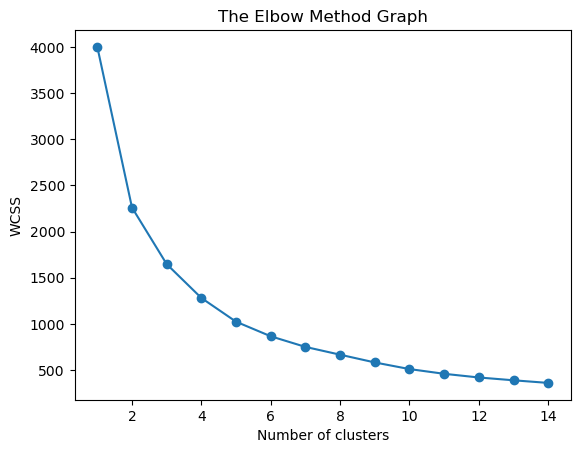

In [14]:
# visualize the elbow visualization
# Importing the necessary library
import matplotlib.pyplot as plt


# Plotting the elbow method graph
plt.plot(range(1,15),wcss, marker = "o")
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
# This is another way to find the optimal k using silhouette score
# Importing the necessary library
import warnings
from sklearn.metrics import silhouette_score
# Looping through a range of clusters
for n_cluster in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:
     # Suppressing warnings during KMeans fitting
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
         # Creating a KMeans object with the current number of clusters (n_cluster)
        kmeans = KMeans(n_clusters=n_cluster,random_state=0).fit(customers_std)
         # Calculating silhouette score
        silhouette_avg = silhouette_score(
            customers_std,
            kmeans.labels_
        )
 # Printing silhouette score for each number of clusters
    print('Silhouette Score for %i Clusters: %0.4f' % (n_cluster,silhouette_avg))

Silhouette Score for 2 Clusters: 0.4427
Silhouette Score for 3 Clusters: 0.4386
Silhouette Score for 4 Clusters: 0.3502
Silhouette Score for 5 Clusters: 0.3647
Silhouette Score for 6 Clusters: 0.3516
Silhouette Score for 7 Clusters: 0.3576
Silhouette Score for 8 Clusters: 0.3524
Silhouette Score for 9 Clusters: 0.3589
Silhouette Score for 10 Clusters: 0.3674
Silhouette Score for 11 Clusters: 0.3726
Silhouette Score for 12 Clusters: 0.3670


In [16]:
 #perform k means cluster analysis using 3 clusters
import warnings
# Suppress warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
     # Creating a KMeans object with 3 clusters and Fitting KMeans to the standardized data
    km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300,random_state=0).fit(customers_std)

The fit_predict() method is used to both fit the model to the data and predict the cluster labels for each data point in a single step.

In [17]:
 #assign data points to clusters
# Suppress warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    # Assigning data points to clusters
    clusters = km.fit_predict(customers_std)
clusters

array([2, 1, 2, ..., 0, 0, 0])

In [18]:
# Adding a new column 'label' to the customers DataFrame and assigning cluster labels
customers['label'] = clusters
customers

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,label
0,100000001,0,0,67,2,124670,1,2,2
1,100000002,1,1,22,1,150773,1,2,1
2,100000003,0,0,49,1,89210,0,0,2
3,100000004,0,0,45,1,171565,1,1,1
4,100000005,0,0,53,1,149031,1,1,2
...,...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0,2
1996,100001997,1,1,27,1,117744,1,0,0
1997,100001998,0,0,31,0,86400,0,0,0
1998,100001999,1,1,24,1,97968,0,0,0


In [19]:
# Creating a DataFrame 'centroids' with cluster centroids coordinates
centroids = pd.DataFrame(km.cluster_centers_, columns = ['Age','Income'])
centroids

,Age,Income
0,-0.530318,-0.509046
1,-0.005012,1.415503
2,1.485068,0.266995


In [20]:
# add a new column called "cluster" to indicate the index of the clusters for each set of the centroids
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
centroids

,Age,Income,cluster
0,-0.530318,-0.509046,Cluster 0
1,-0.005012,1.415503,Cluster 1
2,1.485068,0.266995,Cluster 2


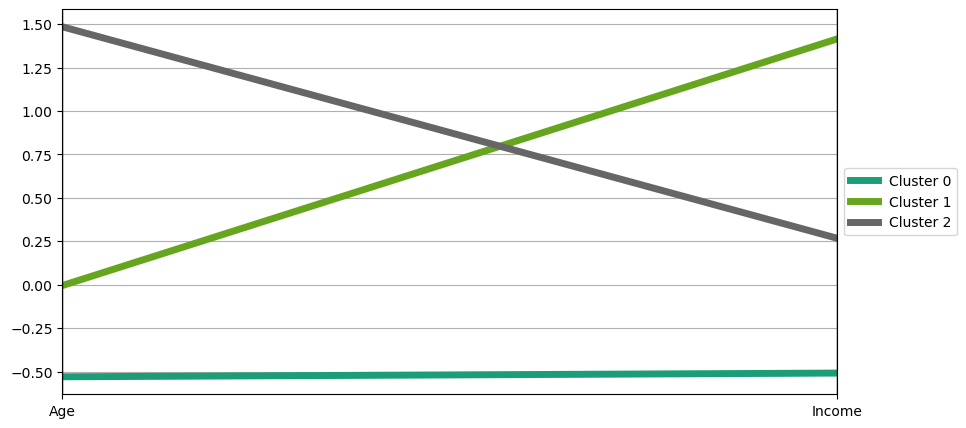

In [21]:
 import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from matplotlib.lines import Line2D
#parallel coordinates visualization
# Plot parallel coordinates visualization
plt.figure(figsize=(10,5))
# Add legend with custom cluster colors
parallel_coordinates(centroids, class_column='cluster', colormap='Dark2',linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

C:\Users\saisa\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


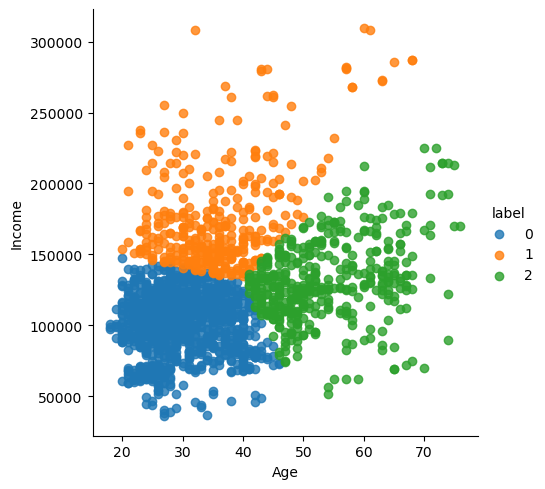

In [22]:
 #visualize the clusters using two variables Age and Income
import seaborn as sns
# Create a scatter plot with Seaborn's lmplot
sns.lmplot(data=customers, x='Age', y='Income',hue='label', fit_reg=False,legend=True)

**Data Understanding and Preparation:**

**What are the key characteristics of the dataset, and how might they influence customer behavior?**

The Key characteristics include ID, sex, marital status, age, education, income, occupation, and settlement size. These characteristics can influence purchasing behavior.

For example, Income may affect purchasing power, while occupation might influence the types of products purchased. Younger individuals might have different spending patterns compared to older ones. Urban and rural customers might have different preferences and needs.

**How can we preprocess the data to ensure it is suitable for clustering analysis?**

We can preprocess the data in the following ways,

**Handling Missing Values:** Check for missing values and decide whether to remove or impute them.  
**Scaling Numerical Variables:** Standardize numerical variables to bring them to a common scale, especially if clustering algorithms rely on distance measures.


**Algorithm Selection:**

**Which clustering algorithms are most suitable for this type of dataset and why?**

K-Means algorithm is more suitable for this type of dataset as it efficiently partitions data into 'k' clusters based on similarity. It works well with numerical features and is computationally efficient. Because Hierarchical Clustering is suitable for datasets with a hierarchical structure, it is not suitable for this type of dataset.

**What are the pros and cons of using K-Means and Hierarchical Clustering in the context of this dataset?**

**K-Means Clustering:**

**Pros:**

 - Works well with numerical features like income and age.
 - Suitable for finding well-separated clusters.

**Cons:**

 - Requires pre-defining the number of clusters (K), which can be challenging.

**Hierarchical Clustering:**

**Pros:**

 - No need to pre-define the number of clusters, discover the natural hierarchy in the data.
 - Handles mixed data types like categorical and numerical effectively.

**Cons:**

 - It Can be computationally expensive for large datasets and visualizing and interpreting dendrograms can be challenging, especially with many data points.
 - Difficult to compare and choose the best clustering outcome at different levels.
 - For example, in this dataset, we have 2000 customer IDs.


**Determining Cluster Number:**

**How can the Elbow Method or other methods be applied to determine the optimal number of clusters for K-Means?**

**Applying the Elbow Method for K-Means:**

 - Run K-Means for different values of k: Use a range of k values and run the K-Means algorithm for each. Calculate the WCSS for each k.
 - Plot the WCSS against k: Create a line plot where the x-axis represents the number of clusters (k), and the y-axis represents the corresponding WCSS.
 - Identify the Elbow: Look for the point on the plot where the decrease in WCSS slows down. This point is the "elbow" and indicates the optimal number of clusters.

**Silhouette Analysis:**

Silhouette Analysis is a technique used to evaluate the goodness of a clustering technique. It provides a way to measure how similar an object is to its cluster (cohesion) compared to other clusters (separation). The silhouette score ranges from -1 to 1, where a high value indicates that the object is well-matched to its cluster and poorly matched to neighboring clusters.

**What insights can be gained from a dendrogram in Hierarchical Clustering?**

A dendrogram is a tree-like diagram that illustrates the arrangement of clusters. In hierarchical clustering, the dendrogram provides insights into the structure of the data:

**Cluster Similarity:** Vertical lines in the dendrogram represent clusters, and the height at which two clusters merge indicates their similarity. Closer merging points suggest more similarity.
**Observation Similarity:** The closer two leaves (individual data points) are on the dendrogram, the more similar they are in terms of features.
**Cutting the Dendrogram:** To determine the number of clusters, you can visually inspect the dendrogram and look for a horizontal line that crosses the fewest vertical lines. Each intersection point represents a potential number of clusters.

Both methods help in determining the optimal number of clusters and understanding the underlying patterns in the data.

**Analysis and Interpretation:**

What distinct customer segments emerge from the clustering process?

We have found 3 distinct customer segments that emerge from the clustering process

How do demographic and socio-economic factors define these customer segments?

1) Customers of Low age have low income

2) Customers of middle age have a higher income than customers of low and high age

Are there any surprising patterns or anomalies in the clustering results?

Although old age people may have more experience than the middle age ones but the customers categorized under middle age are earning more at some points than the old age customers

**Business Insights and Strategy Development:**

**How can the identified customer segments inform targeted marketing strategies?**

Identified customer segments serve as the foundation for targeted marketing strategies by providing insights into the specific needs, preferences, and behaviors of different groups of customers.

In this dataset, we have found from the cluster analysis that the customers of mid-age earn higher income than customers of old and young age. This indicates that the tendency and probability of mid-age customers to buy higher-end products is higher, so we can target marketing of higher-end products to mid-age customers.

**What product development or customization strategies can be derived from understanding these segments?**

Depending on the income levels of customer segments, we can develop products or services that suit different affordability ranges. This could involve offering premium versions for higher-income customers and budget-friendly options for those with lower customers.

**How can the company use this segmentation to optimize store layouts and pricing strategies?**

The store layouts can be optimized in the following ways,
-   **Targeted Product Placement**: Arrange products in-store based on the preferences and purchasing behaviors of different segments. For instance, placing high-margin or premium products in areas frequented by higher-income customers can increase their visibility and likelihood of purchase.
-   **Age-Appropriate Displays**: Tailor store displays and layouts to appeal to specific age demographics. For example, creating interactive displays or incorporating digital signage might attract younger consumers, while providing clear signage and comfortable seating areas could cater to older demographics.

The pricing strategies can be optimized in the following ways,
-   **Dynamic Pricing**: Implement dynamic pricing strategies that adjust prices based on demand, customer demographics, and purchasing patterns. For example, offering discounts or promotions during off-peak hours or targeting lower-income segments with more affordable pricing can optimize revenue and maximize sales volume.
-   **Segment-Specific Pricing**: Set prices for products or services based on the perceived value to different segments. Higher-income customers may be willing to pay a premium for added convenience or luxury, while price-sensitive segments may respond better to competitive pricing or discounts.
-   **Tiered Pricing Models**: Introduce tiered pricing models that offer different levels of service or product features at varying price points. For instance, offering basic, standard, and premium service tiers can cater to customers with different budgets and preferences, maximizing revenue potential.
-   **Bundle Pricing**: Bundle complementary products or services together at a discounted price to incentivize larger purchases and increase average transaction value. Tailor bundle offerings to appeal to specific age and income segments, ensuring relevance and value for customers.

**Validation and Future Steps:**

**What methods can be used to validate the effectiveness of the clustering model?**

To validate the effectiveness of the K-means clustering model, we can use the silhouette score, which measures how well-separated the clusters are. A higher silhouette score indicates better-defined clusters. We can also use visualizations, such as scatter plots or parallel coordinate plots, to visually inspect the separation and compactness of clusters. Matplotlib, Seaborn, or other plotting libraries can be helpful.

For hierarchical clustering, we can inspect the dendrogram to understand the hierarchy and structure of clusters.

**How should the company approach the dynamic nature of customer preferences in future segmentation models?**

To address the dynamic nature of customer preferences in future segmentation models, the company should implement a continuous and adaptive segmentation approach. This involves regularly updating the segmentation model based on the latest customer behavior and preferences. Utilize real-time data, feedback loops, and advanced analytics to capture evolving trends and shifts in customer preferences. Implement machine learning techniques, such as clustering algorithms, that can automatically adapt to changes in customer behavior. Additionally, leverage customer feedback, social media analytics, and other sources to stay attuned to emerging trends. The company should foster a culture of data-driven decision-making and agility to respond swiftly to evolving customer preferences, ensuring that the segmentation model remains relevant and effective in guiding marketing strategies and product offerings. Regularly reassess and refine the segmentation criteria to accommodate shifts in the market landscape and customer expectations.

**Ethical Considerations:** 

**What are the ethical considerations in using customer data for segmentation?** 
Ethical considerations in the use of customer data for segmentation encompass a commitment to fairness, transparency, and the avoidance of discriminatory practices. Businesses should embrace transparency, clearly communicating to customers not only the purpose of data usage but also how their data contributes to segmentation models. Ensure compliance with data protection regulations. Providing customers with control over their data and allowing them to access and manage their information fosters a sense of empowerment and demonstrates respect for individual autonomy. Education initiatives play a pivotal role, in informing customers about data practices, their rights, and the benefits of data-driven services, creating a foundation for ethical engagement and the responsible use of customer data.

**How can the company ensure the privacy and ethical use of this data?** 
Ensuring privacy in customer segmentation involves rigorous measures to protect individuals' personal information. Anonymization of data is paramount, stripping away identifiable details to shield customers from direct identification. Obtaining explicit consent becomes a foundational ethical principle, where customers are fully informed about the purpose of data collection and willingly provide permission. Robust security protocols, such as encryption and access controls, should be implemented to safeguard against unauthorized access or potential breaches. Transparent communication regarding data storage practices and the limited retention of information helps build trust. Privacy considerations extend to third-party sharing, necessitating clear communication and consent mechanisms when data is shared externally. Periodic audits and compliance checks ensure ongoing adherence to privacy regulations, fostering a climate of data responsibility and respect for individual privacy rights.